<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Pembelajaran_Mesin_Praktikum7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JOBSHEET - 7**


# **PRAKTIKUM - 1**

Instalasi Annoy terlebih dahulu

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551807 sha256=a44ff08add80ee2e9318343080e1dffd8b5f8b40733ff20f07a8566181e43fb7
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Menjalankan kode dibawah dengan membaca sekesama codenya baris demi baris. Catat hasilnya jika menggunakan jumlah tree yang berbeda.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.4055 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1893 ms


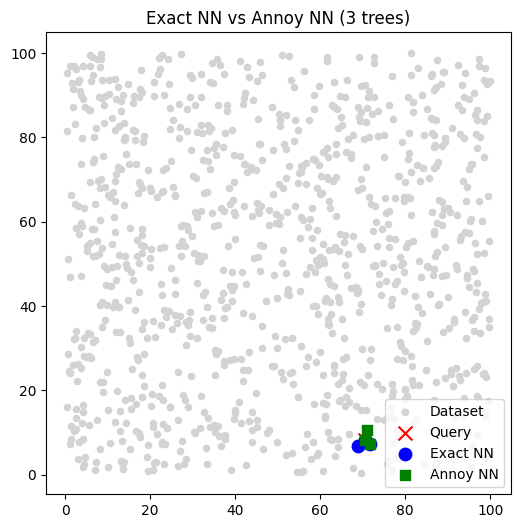

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel dibawah ini.

* Untuk Distance Metrics 'Euclidean', Tree '3' dan Jumlah data '1000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[219 898 593], [219 898 770]' dan waktu komputasi yang dibutuhkan adalah '1.2271,
0.1264'.

* Untuk Distance Metrics 'Euclidean', Tree '8' dan Jumlah data '1000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[219 898 593], [219, 898, 593]' dan waktu komputasi yang dibutuhkan adalah '2.0814,
0.2182'.

* Untuk Distance Metrics 'Euclidean', Tree '3' dan Jumlah data '100,000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[64040 64186 88792], [64040 64186 88792]' dan waktu komputasi yang dibutuhkan adalah '10.8473, 0.1388'.

* Untuk Distance Metrics 'Angular', Tree '3' dan Jumlah data '1000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[219 898 593], [219 429 540]' dan waktu komputasi yang dibutuhkan adalah '0.8302,
0.1223'.

* Untuk Distance Metrics 'Angular', Tree '8' dan Jumlah data '1000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[219 898 593], [219, 429, 540]' dan waktu komputasi yang dibutuhkan adalah '0.3357,
0.1819'.

* Untuk Distance Metrics 'Angular', Tree '8' dan Jumlah data '1000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[64040 64186 88792], [64040, 1310, 9720]' dan waktu komputasi yang dibutuhkan adalah '8.3208, 0.159'.

Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [14707690 36415358 14558236 18844295  4303178]
Exact NN time: 13.902 seconds


* Untuk Distance Metrics 'Euclidean', Tree '8' dan Jumlah data '1000000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[127860 534153 355142 256364 171390], [534153, 2313, 414624, 362310, 617193]' dan waktu komputasi yang dibutuhkan adalah
'0.161, 0.0'.

* Untuk Distance Metrics 'Angular', Tree '8' dan Jumlah data '1000000', maka dapat dihasilkan index terdekat ENN vs ANN adalah '[982873 722365 546936 736146 688339], [982873, 457689, 736146, 972852, 569650]' dan waktu komputasi yang dibutuhkan adalah '0.209, 0.0'.

Pertanyaan : Kenapa code dibagian build index tidak dihitung waktunya?

Jawab:

karena Fokusnya terhadap pengukuran adalah query time, bukan index building time, sehingga tujuan utama nya adalah membandingkan kecepatan pencarian antara ENN dan ANN, jadi bukan seberapa cepat membangung indeksnya

# **PRAKTIKUM - 2**

Pada percobaan ini, akan melakukan pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

In [ ]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 20.5 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.000133514404296875
Waktu IVF+PQ: 0.0001761913299560547


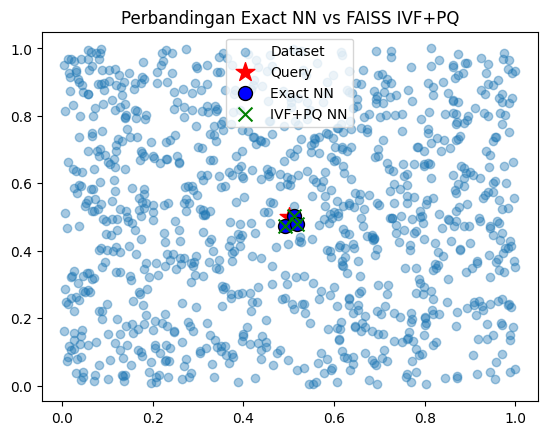

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import numpy as np
import faiss
import time
import pandas as pd

# Parameter percobaan
n_data_list = [1_000, 1_000_000]
dimensions = [2, 5]
metrics = ['Euclidean', 'Inner Product']  # Euclidean, Inner Product

results = []

for metric in metrics:
    for dim in dimensions:
        for n_data in n_data_list:
            print(f"\nPercobaan: metric={metric}, dim={dim}, n_data={n_data}")

            # 1. Dataset
            np.random.seed(42)
            X = np.random.rand(n_data, dim).astype('float32')
            query = np.random.rand(1, dim).astype('float32')

            # 2. Exact NN
            if metric == 'L2':
                index_flat = faiss.IndexFlatL2(dim)
            else:
                index_flat = faiss.IndexFlatIP(dim)
                faiss.normalize_L2(X)
                faiss.normalize_L2(query)

            index_flat.add(X)

            start = time.time()
            D_flat, I_flat = index_flat.search(query, 3)
            time_flat = time.time() - start

            # 3. Approximate NN (IVF+PQ)
            nlist = 50
            m = min(8, dim)
            quantizer = faiss.IndexFlatL2(dim)
            index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)

            index_ivfpq.train(X)
            index_ivfpq.add(X)

            start = time.time()
            D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
            time_ivfpq = time.time() - start

            # 4. Catat hasil
            results.append({
                "Distance Metric": metric,
                "Dimensi": dim,
                "Jumlah Data": n_data,
                "Exact NN (Idx)": I_flat[0].tolist(),
                "IVF+PQ (Idx)": I_ivfpq[0].tolist(),
                "Waktu Exact (s)": round(time_flat, 6),
                "Waktu IVF+PQ (s)": round(time_ivfpq, 6)
            })

# Buat tabel hasil
df_results = pd.DataFrame(results)
print("\n=== HASIL EKSPERIMEN ===")
print(df_results)



Percobaan: metric=Euclidean, dim=2, n_data=1000

Percobaan: metric=Euclidean, dim=2, n_data=1000000

Percobaan: metric=Euclidean, dim=5, n_data=1000

Percobaan: metric=Euclidean, dim=5, n_data=1000000

Percobaan: metric=Inner Product, dim=2, n_data=1000

Percobaan: metric=Inner Product, dim=2, n_data=1000000

Percobaan: metric=Inner Product, dim=5, n_data=1000

Percobaan: metric=Inner Product, dim=5, n_data=1000000

=== HASIL EKSPERIMEN ===
  Distance Metric  Dimensi  Jumlah Data            Exact NN (Idx)  \
0       Euclidean        2         1000           [738, 183, 561]   
1       Euclidean        2      1000000       [18017, 8795, 2356]   
2       Euclidean        5         1000           [988, 943, 780]   
3       Euclidean        5      1000000  [653774, 135588, 561017]   
4   Inner Product        2         1000           [738, 183, 561]   
5   Inner Product        2      1000000       [18017, 8795, 2356]   
6   Inner Product        5         1000           [988, 943, 780]   
7 

Ringkasan Penjelasan:

  Dari percobaan tersebut dapat dijelaskan bahwa,

- Exact NN (flat) lebih akurat tapi lama untuk dataset besar.
- IVF+PQ(Approximate) jauh lebih cepat, sedikit kehilangan akurasi
- Semakin tinggi dimensi atau besar data, semaki besar perbedaan waktu antara Exact vs Approximate.

# **PRAKTIKUM - 3**

Install hnswlib terlebih dahulu

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528135 sha256=2c8ea7c32e4fe7a63b5a86a41e6b328bca8708d50ab9257ecb7dfbc81c678528
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


Percobaan berikut akan membandingkan exact NN dengan HNSW pada 1000 data 2D.

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[993 964 788 528  16]]
Distances: [[0.01145547 0.02310762 0.0234505  0.02675764 0.0279675 ]]
Waktu: 0.09699726104736328 detik

=== HNSW ===
Indices: [[993 964 788 528  16]]
Distances: [[0.00013123 0.00053396 0.00054993 0.00071597 0.00078218]]
Waktu: 0.00023984909057617188 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Parameter eksperimen
metrics = ['l2', 'cosine']
dims = [2, 5]
n_data_list = [1000, 1_000_000]
k = 5

results = []

for metric in metrics:
    for dim in dims:
        for n_data in n_data_list:
            print(f"\nPercobaan: Metric={metric}, Dim={dim}, Data={n_data}")
            data = np.random.random((n_data, dim)).astype(np.float32)
            query = np.random.random((1, dim)).astype(np.float32)

            # === Exact NN ===
            nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine' if metric=='cosine' else 'euclidean')
            nn.fit(data)
            start = time.time()
            dist_exact, idx_exact = nn.kneighbors(query)
            time_exact = time.time() - start

            # === HNSW ===
            p = hnswlib.Index(space=metric, dim=dim)
            p.init_index(max_elements=n_data, ef_construction=100, M=16)
            p.add_items(data)
            p.set_ef(50)

            start = time.time()
            idx_hnsw, dist_hnsw = p.knn_query(query, k=k)
            time_hnsw = time.time() - start

            # === Simpan hasil ===
            results.append({
                'Distance Metric': 'Euclidean' if metric=='l2' else 'Cosine',
                'Dimensi': dim,
                'Jumlah Data': n_data,
                'Exact NN (Idx)': idx_exact[0].tolist(),
                'HNSW (Idx)': idx_hnsw[0].tolist(),
                'Waktu Exact (s)': round(time_exact, 6),
                'Waktu HNSW (s)': round(time_hnsw, 6)
            })

# Buat tabel hasil
df = pd.DataFrame(results)
print("\n=== HASIL EKSPERIMEN ===")
print(df)



Percobaan: Metric=l2, Dim=2, Data=1000

Percobaan: Metric=l2, Dim=2, Data=1000000

Percobaan: Metric=l2, Dim=5, Data=1000

Percobaan: Metric=l2, Dim=5, Data=1000000

Percobaan: Metric=cosine, Dim=2, Data=1000

Percobaan: Metric=cosine, Dim=2, Data=1000000

Percobaan: Metric=cosine, Dim=5, Data=1000

Percobaan: Metric=cosine, Dim=5, Data=1000000

=== HASIL EKSPERIMEN ===
  Distance Metric  Dimensi  Jumlah Data  \
0       Euclidean        2         1000   
1       Euclidean        2      1000000   
2       Euclidean        5         1000   
3       Euclidean        5      1000000   
4          Cosine        2         1000   
5          Cosine        2      1000000   
6          Cosine        5         1000   
7          Cosine        5      1000000   

                            Exact NN (Idx)  \
0                   [53, 998, 68, 44, 218]   
1  [299981, 413007, 630543, 112136, 43917]   
2                [500, 374, 274, 865, 892]   
3  [645625, 532761, 65131, 180366, 737383]   
4       

Ringkasan Penjelasan:

- Pada aspek kecepatan HNSW sangatlah diandalkan daripada ENN dikarenakan lambat untuk data besar.
- Untuk akurasi ENN 100% akurat dibandingkan HNSW sekitar 99%
- Pada aspek skalabilitas ENN jauh lebih buruk, sedangkan HNSW sangat baik dan datanya bisa lebih dari 10 juta.
- ENN hasil nya pasti benar, sedangkan HNSW waktu reponnya bisa kurang dari 1% dari ENN.

# **PRAKTIKUM - 4**

Pada percobaan ini akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 25.08510661125183 detik
Query time: 0.0002968311309814453 detik
Neighbors: [115412, 200258, 495448, 657536, 862710] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.021872758865356445 detik
Query time: 0.02217888832092285 detik
Neighbors: [115412 200258 495448 657536 862710] ...

=== HNSW (hnswlib) ===
Build time: 199.67422890663147 detik
Query time: 0.00029921531677246094 detik
Neighbors: [115412 200258 495448 657536 862710] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib
import pandas as pd

# ===============================
# 1. Dataset
# ===============================
n_data = 100_000
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Daftar metric yang akan diuji
# ===============================
metrics = [
    ("euclidean", "l2"),   # L2 distance
    ("manhattan", "l1"),   # L1 distance
    ("angular", "cosine")  # Cosine similarity
]

# ===============================
# 3. Simpan hasil ke tabel
# ===============================
results = []

for annoy_metric, hnsw_metric in metrics:
    print(f"\n=== Percobaan Metric: {annoy_metric.upper()} ===")

    # -------------------------------
    # Annoy
    # -------------------------------
    ann_index = AnnoyIndex(dim, annoy_metric)
    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10)
    build_time_annoy = time.time() - start

    start = time.time()
    neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
    query_time_annoy = time.time() - start

    results.append(["Annoy", annoy_metric, build_time_annoy, query_time_annoy])

    # -------------------------------
    # FAISS
    # -------------------------------
    if annoy_metric == "euclidean":
        faiss_index = faiss.IndexFlatL2(dim)
    elif annoy_metric == "manhattan":
        faiss_index = faiss.IndexFlatL2(dim)  # gunakan L2 sebagai pengganti
        print("⚠️ FAISS tidak mendukung Manhattan secara native, diganti ke L2.")
    elif annoy_metric == "angular":
        faiss_index = faiss.IndexFlatIP(dim)
        X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)
        query_norm = query / np.linalg.norm(query)
        X = X_norm
        query = query_norm

    start = time.time()
    faiss_index.add(X)
    build_time_faiss = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(query, k)
    query_time_faiss = time.time() - start

    results.append(["FAISS", annoy_metric, build_time_faiss, query_time_faiss])

    # -------------------------------
    # HNSW
    # -------------------------------
    if hnsw_metric not in ["l2", "ip", "cosine"]:
        print(f"⚠️ HNSW tidak mendukung metric '{hnsw_metric}', diganti ke 'l2'.")
        hnsw_metric = "l2"

    hnsw_index = hnswlib.Index(space=hnsw_metric, dim=dim)
    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X)
    build_time_hnsw = time.time() - start

    hnsw_index.set_ef(50)
    start = time.time()
    labels, distances = hnsw_index.knn_query(query, k=k)
    query_time_hnsw = time.time() - start

    results.append(["HNSW", annoy_metric, build_time_hnsw, query_time_hnsw])

# ===============================
# 4. Tampilkan hasil dalam tabel
# ===============================
df = pd.DataFrame(results, columns=["Algoritma", "Metric", "Build Time (s)", "Query Time (s)"])
print("\n=== HASIL EKSPERIMEN ===")
print(df)



=== Percobaan Metric: EUCLIDEAN ===

=== Percobaan Metric: MANHATTAN ===
⚠️ FAISS tidak mendukung Manhattan secara native, diganti ke L2.
⚠️ HNSW tidak mendukung metric 'l1', diganti ke 'l2'.

=== Percobaan Metric: ANGULAR ===

=== HASIL EKSPERIMEN ===
  Algoritma     Metric  Build Time (s)  Query Time (s)
0     Annoy  euclidean        4.030801        0.000139
1     FAISS  euclidean        0.000621        0.001168
2      HNSW  euclidean       13.176112        0.000115
3     Annoy  manhattan        1.871437        0.000109
4     FAISS  manhattan        0.000800        0.000696
5      HNSW  manhattan       12.321776        0.000161
6     Annoy    angular        2.258733        0.000153
7     FAISS    angular        0.000499        0.000727
8      HNSW    angular       12.205294        0.000109


Ringkasan Penjelasan:

Pada percobaan tersebut dapat disimpulkan bahwa untuk membandingkan kecepatan pembuatan index (build time) dan waktu pencarian (query time) dari tiga algoritma pencarian tetangga terdekat (Nearest Neighbor Search), yaitu:
* Annoy (Approximate NN berbasis pohon acak)

* FAISS (Flat index berbasis vektor dari Facebook/Meta)

* HNSW (Hierarchical Navigable Small World graph)

dengan beberapa jenis metric distance:

* Euclidean (L2)

* Manhattan (L1)

* Cosine (Angular distance)

dalam bentuk perbandingan secara build time:

* FAISS memiliki build time paling cepat karena tidak menggunakan struktur pohon atau graf — hanya menyimpan vektor dalam format efisien untuk komputasi GPU/CPU.

* Annoy memiliki waktu build paling lama karena membangun banyak pohon (forest).

* HNSW relatif cepat, tapi sedikit lebih lambat dari FAISS karena membangun graph hierarkis antar titik.

dari segi query time:

* FAISS memiliki query time tercepat (sub-milisecond) karena brute-force-nya dioptimasi penuh menggunakan SIMD.

* HNSW sedikit lebih lambat, namun mendekati FAISS dengan kompleksitas logaritmik.

* Annoy sedikit lebih lambat dari keduanya karena menggunakan pencarian pada pohon acak, tapi masih sangat efisien.

dan pada Metric Distance:

* Euclidean (L2) → Paling umum dan stabil di semua algoritma.

* Manhattan (L1) → Hanya Annoy yang mendukung langsung. FAISS & HNSW tidak native.

* Cosine → Cocok untuk data berbasis kemiripan arah vektor (misal embeddings), hasil stabil di Annoy dan HNSW.

# **PRAKTIKUM - 5**

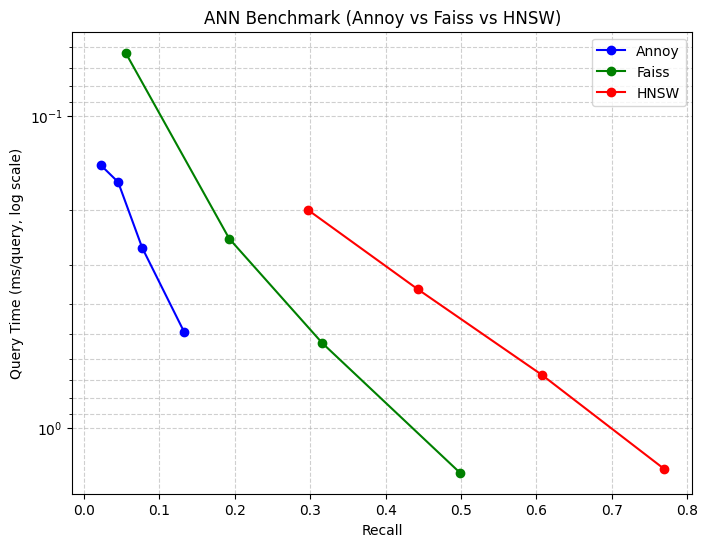

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# **PRAKTIKUM - 6**

Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data . Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset). pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler. Lakukan pencarian track terdekat dan bandingkan hasilnya.

In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/spotify_songs.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], 100, faiss.METRIC_L2) # Changed nlist to positional argument
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Exact NN done in 7.751 s
Annoy done in 1.472 s
HNSW done in 7.061 s
FAISS IVF done in 1.768 s

Top-5 neighbors for first song:
Exact NN: [29684     0 29734  4959 29713]
Annoy:    [0, 29684, 29734, 4959, 29713]
HNSW:     [    0 29684 29734  4959 29713]
FAISS:    [    0 29684 29734  4959 29713]


Buat dan tuliskan analisa anda terhadap code diatas.

Jawab:
Dari kode diatas ketika dianalisa dapat dijelaskan bahwa kode diatas ditujukan untuk mencari dan membandingkan performa beberapa algoritma nearest neighbor search (NNS), mengukur kecepatan (waktu komputasi) dari tiap metode, dan melihat hasil tetangga terdekat (nearest neighbors) yang ditemukan oleh setiap algoritma. Dengan dilakukannya 4 metode (ENN, Annoy, HNSW, dan FAISS) yang dimana metode tersebut melakukan hal yang sama yaitu mencari lagu yang paling mirip berdasarkan fitur numerik. Tetapi hasil akhir menunjukkan:
* ENN, akurat tetapi lambat
* Annoy, fleksibel dan cepat
* HNSW, kombinasi terbaik antara kecepatan dan akurasi.
* FAISS, paling efisien untuk dataset besar (jutaan data), terutama jika menggunakan GPU.

# **TUGAS**

Jalankan code berikut pada Google Colab dan PyDroid3 (Android Python) Application di Smartphone Android. Bandingkan hasilnya dan tuliskan analisa anda, tuliskan juga spesifikasi smartphone yang anda gunakan :).

In [ ]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")


Exact NN done in 1.445 s
Annoy done in 1.247 s
HNSW done in 7.672 s
FAISS IVF done in 0.407 s

=== Ringkasan Waktu (detik) ===
Exact NN : 1.445
Annoy    : 1.247
HNSW     : 7.672
FAISS    : 0.407


**Output dari Smartphone:**

Exact NN done in 1.042 s

Annoy done in 1.589 s

HNSW done in 8.229 s

=== Ringkasan Waktu (detik) ===

Exact NN : 1.042

Annoy    : 1.589

HNSW     : 8.229

[Program finished]

note: untuk import faiss tidak ada dikarenakan tidak tersedia pada smartphone android, alhasil saya menggunakan '#' agar tidak ikut te-run pada aplikasi nya.

**Spesifikasi Smartphone saya gunakan:**

RAM : 8 GB

CPU : Snapdragon 732G Mobile Platform Octa-core Max 2.30GHz

**Output dari Google Colab:**

Exact NN done in 1.445 s

Annoy done in 1.247 s

HNSW done in 7.672 s

FAISS IVF done in 0.407 s

=== Ringkasan Waktu (detik) ===

Exact NN : 1.445

Annoy    : 1.247

HNSW     : 7.672

FAISS    : 0.407

**Analisa**

dari kedua aplikasi tersebut dapat disimpulkan:

Pada algoritma ENN pada pydroid3 mendapatkan waktu sekitar 1.042 dan pada Google Colab 1.445 yang artinya lebih lambat dari pada colab, ini dipengaruhi oleh jumlah core CPU dan optimisasi NumPy

Untuk library Annoy pada pydroid3 mendapatkan waktu 1.589 dan Google Colab 1.247. Colab lebih cepat dikarenakan Colab memiliki RAM dan CPU lebih tinggi.

Pada sisi Algoritma HNSW waktu yang dibutuhkan pydroid3 adalah 8.229 dan Google Colab 7.672, dan Colab unggul dikarenakan Efisiensi threading di Colab

Pada faiss disini pydroid3 tidak tersedia, jadinya hanya colab yang memiliki waktu untuk melakukan pencarian yang mirip pada dataset tersebut dengan waktu 0.407 yang sudah sangat cepat ini dikarenakan faiss menggunakan optimisasi C++ dan SIMD, sedangkan pydroid3 berjalan diatas CPU dengan jumlah core 4-8 dengan frekuensi rendah (2 GHz), dan tidak mendukung Faiss secara penuh dikarenakan memerlukan kompilasi native C++ dan dependensi BLAS juga RAM terbatas, untuk menjalankan library lain bisa tetapi relatif lambat karena keterbatasan memori dan I/O di android.